**PROYECTO FINAL TC1002**

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

*1. Leer el dataset con pandas*

In [21]:
df = pd.read_csv("diabetes2.csv")
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


*2. Matriz característica y vector de clases*

In [22]:
data = df.values

#matriz de características
X = data[:,0:8]

#vector de clases
y = data[:,8]


*3. Identificar la o las variables (s)[características] que más información nos proporciona acerca de la clase del dataset*

In [23]:
df = df.rename(columns = {'class':'Class'})
dfpos = df[df.Class == "tested_positive"]
dfneg = df[df.Class == "tested_negative"]

print(dfpos.shape)
print(dfneg.shape)

"""
La variable que se encontró más significativa en el dataset fue: plas
La segunda variable más significativa, aunque en menor medida, es mass.
"""

(268, 9)
(500, 9)


'\nLa variable que se encontró más significativa en el dataset fue: plas\nLa segunda variable más significativa, aunque en menor medida, es mass.\n'

*4. Visualizaciones*

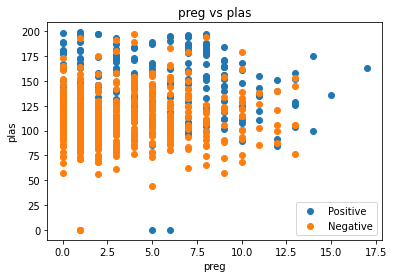

In [24]:
plt.scatter(dfpos.preg,dfpos.plas)
plt.scatter(dfneg.preg,dfneg.plas)
plt.xlabel("preg")
plt.ylabel("plas")
plt.title("preg vs plas")
plt.legend(["Positive", "Negative"])

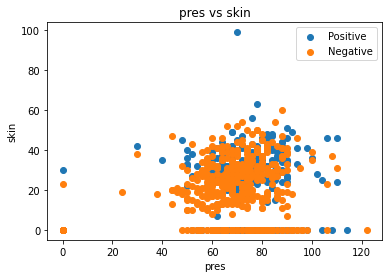

In [25]:
plt.scatter(dfpos.pres,dfpos.skin)
plt.scatter(dfneg.pres,dfneg.skin)
plt.xlabel("pres")
plt.ylabel("skin")
plt.title("pres vs skin")
plt.legend(["Positive", "Negative"])

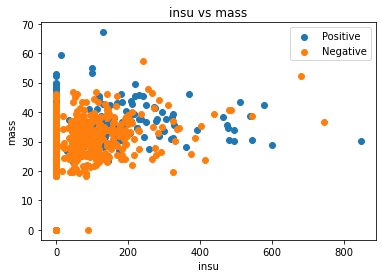

In [26]:
plt.scatter(dfpos.insu,dfpos.mass)
plt.scatter(dfneg.insu,dfneg.mass)
plt.xlabel("insu")
plt.ylabel("mass")
plt.title("insu vs mass")
plt.legend(["Positive", "Negative"])

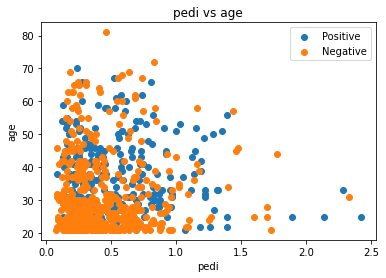

In [27]:
plt.scatter(dfpos.pedi,dfpos.age)
plt.scatter(dfneg.pedi,dfneg.age)
plt.xlabel("pedi")
plt.ylabel("age")
plt.title("pedi vs age")
plt.legend(["Positive", "Negative"])

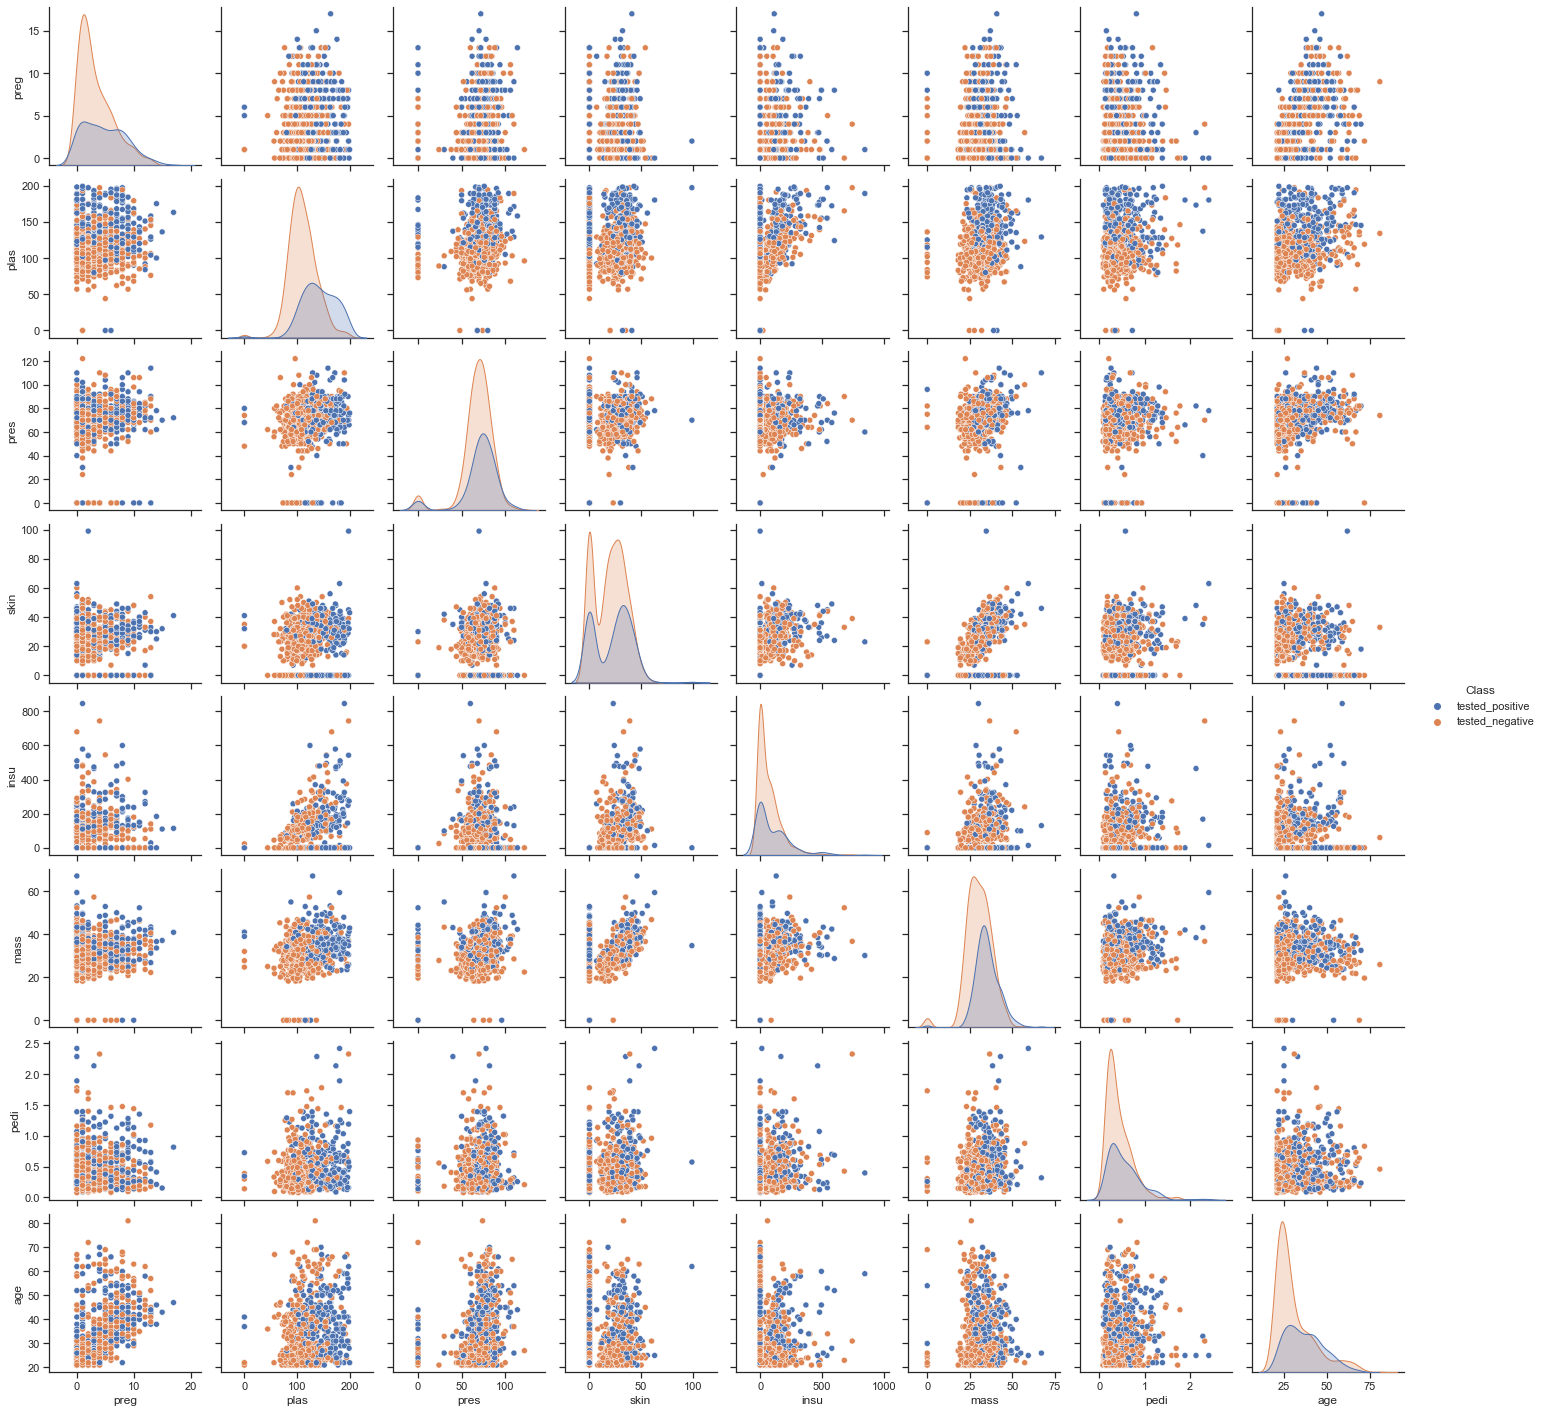

In [28]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="Class")

[0.08569116 0.26314159 0.09204425 0.07015838 0.07374958 0.15810777
 0.1302074  0.12689988]


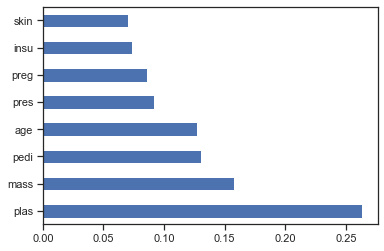

In [29]:
#Feature importance 
X1 = df.iloc[:,0:8] 
y1 = df.iloc[:,-1]
model = RandomForestClassifier()
model.fit(X1,y1)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

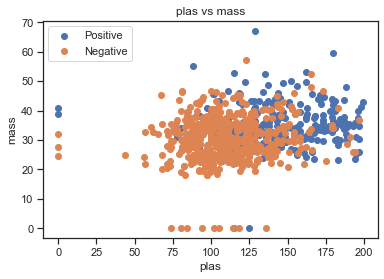

In [30]:
plt.scatter(dfpos.plas,dfpos.mass)
plt.scatter(dfneg.plas,dfneg.mass)
plt.xlabel("plas")
plt.ylabel("mass")
plt.title("plas vs mass")
plt.legend(["Positive", "Negative"])

Text(0, 0.5, 'plas')

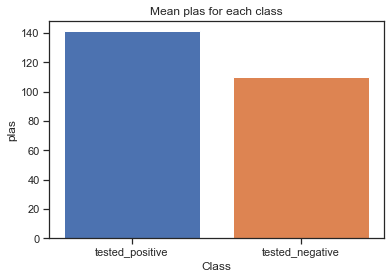

In [31]:
plt.bar(dfpos.Class,dfpos.plas.mean())
plt.bar(dfneg.Class,dfneg.plas.mean())
plt.title("Mean plas for each class")
plt.xlabel("Class")
plt.ylabel("plas")

Text(0, 0.5, 'mass')

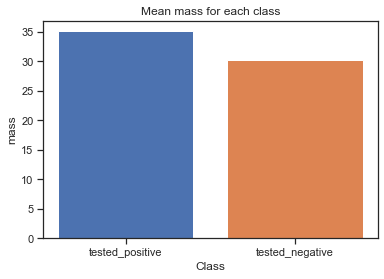

In [32]:
plt.bar(dfpos.Class,dfpos.mass.mean())
plt.bar(dfneg.Class,dfneg.mass.mean())
plt.title("Mean mass for each class")
plt.xlabel("Class")
plt.ylabel("mass")

*5. Modelo de predicción basado en KNN*

    a. División del dataset (50% entrenamiento, 50% pruebas)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


    b. Selección de k de manera experimental (k de 3 a 11)

In [34]:
for k in range(3,12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = neigh.score(X_test,y_test)
    print(k,score)
    
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train,y_train)

3 0.6953125
4 0.703125
5 0.703125
6 0.6953125
7 0.6901041666666666
8 0.7057291666666666
9 0.7239583333333334
10 0.71875
11 0.71875


KNeighborsClassifier(n_neighbors=9)

    c. Muestra nueva por clase

In [35]:
dfpos.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [36]:
dfneg.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [37]:
print(neigh.predict([[4,20,70,22,100,35,0.55,37]])) #tested-positive
print(neigh.predict([[3,100,68,19,68,30,0.42,31]])) #tested-negative
"""
En este caso es posible observar que el valor clave para cambiar entre clases es plas, ya que este cuenta con
una significancia muy alta.
En caso de que se pongan valores muy altos, el resultado que se predice es que caso positivo de diabetes, y en el caso
contrario, caso negativo de diabetes.
"""

['tested_negative']
['tested_negative']


'\nEn este caso es posible observar que el valor clave para cambiar entre clases es plas, ya que este cuenta con\nuna significancia muy alta.\nEn caso de que se pongan valores muy altos, el resultado que se predice es que caso positivo de diabetes, y en el caso\ncontrario, caso negativo de diabetes.\n'

*6. Conclusiones del análisis*

En base a las gráficasque desarrollamos a lo largo del notebook pudimos observar que la variable plas que representa los niveles de glucosa en el paciente es el factor que más influye para determinar si este padece de diabetes. Esto lo pudimos demostrar ya que en todas las gráficas donde este valor se utiliza en alguno de sus ejes los casos positivos de agrupan en los niveles altos de plas. Además las funciones corr e importance las cuales son algoritmos que ayudan a determinar variables más influyentes en los marcos de datos también arrojan que es la variable que más influye en el diagnóstico de la diabetes. Por otro lado lo comparamos con mass el cual es el segundo más influyente, esta variable se comporta de forma similar pero en menor medida. 
